In [ ]:
import pandas as pd 
file_path = './tuning_results/tune_19/result/tuning_result_tfbind8_lr0.05.csv' 
df = pd.read_csv(file_path) 
df = df.sort_values(by='mean (100th)',ascending=False)
df = df[df['mean (100th)']>0.95]
print(len(df))
df

In [1]:
import pandas as pd 
import numpy as np 

num_fit_samples_list = [10000,12000,13000,14000,15000,16000,17000,18000] 
best_tf8_hyper = None 
lengthscale = 6.25
for num_fit_samples in num_fit_samples_list: 
    best_tf8_hyper1 =  pd.read_csv(f'tuning_results/tune_23/result/tuning_result_tfbind8_num_fit_samples{num_fit_samples}_lengthscale{lengthscale}_sampling_lr0.05_delta0.25.csv')
    best_tf8_hyper1 = best_tf8_hyper1[best_tf8_hyper1['mean (100th)']>0.985]
    best_tf8_hyper = pd.concat([best_tf8_hyper,best_tf8_hyper1])
best_tf8_hyper_1 = best_tf8_hyper[['eta', 'alpha', 'classifier_free_guidance_weight']].to_numpy()
best_tf8_hyper_1 = np.unique(best_tf8_hyper_1,axis=0)
print(len(best_tf8_hyper_1))
best_tf8_hyper = best_tf8_hyper.sort_values(by= 'mean (100th)',ascending= False)
best_tf8_hyper.head(50)


42


,num_fit_samples,sampling_lr,lengthscale,delta,eta,alpha,classifier_free_guidance_weight,mean (100th),std (100th),mean (80th),std (80th),mean (50th),std (50th)
199,17000,0.05,6.25,0.25,0.75,0.80,-1.5,0.988339,0.007687,0.820047,0.010891,0.650288,0.020193
195,17000,0.05,6.25,0.25,0.75,0.85,-1.5,0.988339,0.007687,0.820424,0.011271,0.645745,0.022213
187,17000,0.05,6.25,0.25,0.75,0.95,-1.5,0.988339,0.007687,0.820319,0.012415,0.642994,0.025989
191,17000,0.05,6.25,0.25,0.75,0.90,-1.5,0.988339,0.007687,0.820006,0.011750,0.645878,0.025174
86,16000,0.05,6.25,0.25,0.20,0.95,-2.0,0.987608,0.007825,0.840609,0.016091,0.677095,0.020079
198,17000,0.05,6.25,0.25,0.75,0.80,-2.0,0.987477,0.007660,0.818428,0.018572,0.647526,0.020534
183,17000,0.05,6.25,0.25,0.75,1.00,-1.5,0.987302,0.007340,0.820393,0.013013,0.639457,0.024121
135,15000,0.05,6.25,0.25,0.30,0.85,-1.5,0.986980,0.004225,0.838188,0.011091,0.674140,0.015100
139,15000,0.05,6.25,0.25,0.30,0.80,-1.5,0.986980,0.004225,0.839479,0.010970,0.675677,0.018222
110,15000,0.05,6.25,0.25,0.25,0.90,-2.0,0.986951,0.005840,0.842246,0.010827,0.663057,0.018548


In [ ]:
import pandas as pd 

best_tf10_hyper = pd.read_csv('./tuning_results/tune_23/result/tuning_result_tfbind10_lengthscale6.5_sampling_lr0.05_delta0.25.csv')
best_tf10_hyper = best_tf10_hyper[best_tf10_hyper['mean (100th)']>0.65]
# best_tf8_hyper = None
# for num_fit_samples in  [10000,12000,13000,14000,15000,16000,17000,18000] : 
#     best_tf8_hyper1 = pd.read_csv(f'./tuning_results/tune_23/result/tuning_result_tfbind8_num_fit_samples{num_fit_samples}_lengthscale5.75_sampling_lr0.05_delta0.25.csv')
#     best_tf8_hyper1 = best_tf8_hyper1[best_tf8_hyper1['mean (100th)']>0.97] 
#     best_tf8_hyper = pd.concat([best_tf8_hyper1,best_tf8_hyper],ignore_index=True) 
# best_tf8_hyper = best_tf8_hyper.merge(best_tf10_hyper, on= ['sampling_lr','lengthscale','delta','eta','alpha','classifier_free_guidance_weight'])
# best_tf8_hyper
best_tf10_hyper
                        

In [ ]:
import pandas as pd 

best_tf10_hyper = pd.read_csv('./tuning_results/tune_22_100steps/result/tuning_result_tfbind10_num_fit_samples10000_lengthscale6.0_sampling_lr0.05_delta0.25.csv')
best_tf10_hyper = best_tf10_hyper[best_tf10_hyper['mean (100th)']>0.67]
best_tf8_hyper  = pd.read_csv('./tuning_results/tune_20/result/tuning_result_tfbind8_lengthscale6.0_sampling_lr0.05_delta0.25.csv')
best_tf8_hyper.merge(best_tf10_hyper, on = ['sampling_lr','eta','alpha','delta','lengthscale','classifier_free_guidance_weight'])
                        

In [ ]:

import torch 
import random
import numpy as np 

def set_random_seed(SEED=1234):
    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True


set_random_seed(0) 
set_random_seed(0)
print(torch.randint(1,10,(10,))) 
print(1)
set_random_seed(1) 
print(torch.randint(1,10,(10,)))
set_random_seed(0) 
print(torch.randint(1,10,(10,)))
set_random_seed(1) 
print(torch.randint(1,10,(10,)))

In [ ]:
import torch

# Create offline_y with duplicate values, and some values repeating in a specific order
offline_y = torch.tensor([1.0, 2.0, 3.0, 3.0, 2.0, 1.0, 5.0, 4.0, 5.0, 4.0])
offline_x = torch.arange(len(offline_y))  # For simplicity, x is just indices [0, 1, 2, ...]

# First code:
sorted_indices = torch.argsort(offline_y)[-5:]  # Top 5 largest elements
offline_x_1 = offline_x[sorted_indices]
offline_y_1 = offline_y[sorted_indices]

# Re-sorting the top 5 largest elements
indices_1 = torch.argsort(offline_y_1)
offline_x_1 = offline_x_1[indices_1]
offline_y_1 = offline_y_1[indices_1]

print(f"First Code - offline_x_1: {offline_x_1}, offline_y_1: {offline_y_1}")

# Second code:
indices_2 = torch.argsort(offline_y)
offline_x_2 = offline_x[indices_2]
offline_y_2 = offline_y[indices_2]

# Selecting the top 5 largest elements
offline_x_2 = offline_x_2[-5:]
offline_y_2 = offline_y_2[-5:]

print(f"Second Code - offline_x_2: {offline_x_2}, offline_y_2: {offline_y_2}")

# Check if outputs are identical
print(torch.equal(offline_x_1, offline_x_2))  # Check if offline_x are the same
print(torch.equal(offline_y_1, offline_y_2))  # Check if offline_y are the same


In [6]:
import pandas as pd 

lengthscale = 6.25
best_tf10_hyper = pd.read_csv(f'./tuning_results/tune_23/result/tuning_result_tfbind10_lengthscale{lengthscale}_sampling_lr0.05_delta0.25_1.csv')
best_tf10_hyper = best_tf10_hyper[best_tf10_hyper['mean (100th)']>0.67]
num_fit_samples_list = [10000,12000,13000,14000,15000,16000,17000,18000] 
best_tf8_hyper = None 
print(len(best_tf10_hyper))
for num_fit_samples in num_fit_samples_list:
    best_tf8_hyper_1 = pd.read_csv(f'./tuning_results/tune_23/result/tuning_result_tfbind8_num_fit_samples{num_fit_samples}_lengthscale{lengthscale}_sampling_lr0.05_delta0.25.csv')
    best_tf8_hyper_1 = best_tf8_hyper_1[best_tf8_hyper_1['mean (100th)']>0.985] 
    best_tf8_hyper = pd.concat([best_tf8_hyper_1, best_tf8_hyper])  
print(len(best_tf8_hyper))
best_tf8_hyper= best_tf8_hyper.merge(best_tf10_hyper, on = ['sampling_lr','eta','alpha','delta','lengthscale','classifier_free_guidance_weight'])
best_tf8_hyper = best_tf8_hyper[['num_fit_samples_x','eta','alpha','classifier_free_guidance_weight','mean (100th)_x','mean (100th)_y','std (100th)_x','std (100th)_y','mean (50th)_x','mean (50th)_y','std (50th)_x','std (50th)_y','mean (80th)_x','mean (80th)_y','std (80th)_x','std (80th)_y']]
# Rename columns
best_tf8_hyper = best_tf8_hyper.rename(columns={
    'num_fit_samples_x': 'num_fit_samples',
    'eta': 'eta_tf',
    'alpha': 'alpha',
    'classifier_free_guidance_weight': 'classifier_free_guidance_weight',
    'mean (100th)_x': 'mean (100th)_tf8',
    'mean (100th)_y': 'mean (100th)_tf10',
    'std (100th)_x': 'std (100th)_tf8',
    'std (100th)_y': 'std (100th)_tf10',
    'mean (50th)_x': 'mean (50th)_tf8',
    'mean (50th)_y': 'mean (50th)_tf10',
    'std (50th)_x': 'std (50th)_tf8',
    'std (50th)_y': 'std (50th)_tf10',
    'mean (80th)_x': 'mean (80th)_tf8',
    'mean (80th)_y': 'mean (80th)_tf10',
    'std (80th)_x': 'std (80th)_tf8',
    'std (80th)_y': 'std (80th)_tf10'

})

best_ant_hyper = pd.read_csv('tuning_results/tune_23/result/tuning_result_ant_lengthscale1.0_sampling_lr0.001_delta0.25.csv')
best_ant_hyper = best_ant_hyper[best_ant_hyper['mean (100th)']>0.96] 
best_dkitty_hyper = pd.read_csv('tuning_results/tune_23/result/tuning_result_dkitty_lengthscale1.0_sampling_lr0.001_delta0.25.csv')
best_dkitty_hyper = best_dkitty_hyper[best_dkitty_hyper['mean (100th)']>0.97]
best_ant_hyper = best_ant_hyper.merge(best_dkitty_hyper,on = ['sampling_lr','eta','alpha','delta','lengthscale','classifier_free_guidance_weight']) 

best_ant_hyper = best_ant_hyper[['eta','alpha','classifier_free_guidance_weight','mean (100th)_x','mean (100th)_y','std (100th)_x','std (100th)_y','mean (50th)_x','mean (50th)_y','std (50th)_x','std (50th)_y','mean (80th)_x','mean (80th)_y','std (80th)_x','std (80th)_y']]

best_ant_hyper = best_ant_hyper.rename(columns={
    'eta': 'eta_cont',
    'alpha': 'alpha',
    'classifier_free_guidance_weight': 'classifier_free_guidance_weight',
    'mean (100th)_x': 'mean (100th)_ant',
    'mean (100th)_y': 'mean (100th)_dkitty',
    'std (100th)_x': 'std (100th)_ant',
    'std (100th)_y': 'std (100th)_dkitty',
    'mean (50th)_x': 'mean (50th)_ant',
    'mean (50th)_y': 'mean (50th)_dkitty',
    'std (50th)_x': 'std (50th)_ant',
    'std (50th)_y': 'std (50th)_dkitty',
    'mean (80th)_x': 'mean (80th)_ant',
    'mean (80th)_y': 'mean (80th)_dkitty',
    'std (80th)_x': 'std (80th)_ant',
    'std (80th)_y': 'std (80th)_dkitty'
})
best_ant_hyper = best_ant_hyper.merge(best_tf8_hyper, on=['alpha','classifier_free_guidance_weight'])
best_ant_hyper[['num_fit_samples','eta_tf','eta_cont','alpha','classifier_free_guidance_weight','mean (100th)_ant','std (100th)_ant','mean (100th)_dkitty','std (100th)_dkitty','mean (100th)_tf8','std (100th)_tf8', 'mean (100th)_tf10', 'std (100th)_tf10']]

6
45


,num_fit_samples,eta_tf,eta_cont,alpha,classifier_free_guidance_weight,mean (100th)_ant,std (100th)_ant,mean (100th)_dkitty,std (100th)_dkitty,mean (100th)_tf8,std (100th)_tf8,mean (100th)_tf10,std (100th)_tf10
0,15000,0.2,0.00,0.8,-1.5,0.960583,0.014716,0.973676,0.004914,0.98589,0.006732,0.685157,0.052762
1,15000,0.2,0.05,0.8,-1.5,0.964852,0.015509,0.973425,0.005035,0.98589,0.006732,0.685157,0.052762
2,15000,0.2,0.20,0.8,-1.5,0.965333,0.013557,0.972051,0.005118,0.98589,0.006732,0.685157,0.052762


In [7]:
best_ant_hyper[['num_fit_samples','eta_tf','eta_cont','alpha','classifier_free_guidance_weight','mean (50th)_ant','std (50th)_ant','mean (50th)_dkitty','std (50th)_dkitty','mean (50th)_tf8','std (50th)_tf8', 'mean (50th)_tf10', 'std (50th)_tf10']]

,num_fit_samples,eta_tf,eta_cont,alpha,classifier_free_guidance_weight,mean (50th)_ant,std (50th)_ant,mean (50th)_dkitty,std (50th)_dkitty,mean (50th)_tf8,std (50th)_tf8,mean (50th)_tf10,std (50th)_tf10
0,15000,0.2,0.00,0.8,-1.5,0.716448,0.020384,0.921065,0.002660,0.674995,0.026171,0.472681,0.004093
1,15000,0.2,0.05,0.8,-1.5,0.720881,0.013926,0.920798,0.002807,0.674995,0.026171,0.472681,0.004093
2,15000,0.2,0.20,0.8,-1.5,0.711568,0.013848,0.919340,0.002913,0.674995,0.026171,0.472681,0.004093


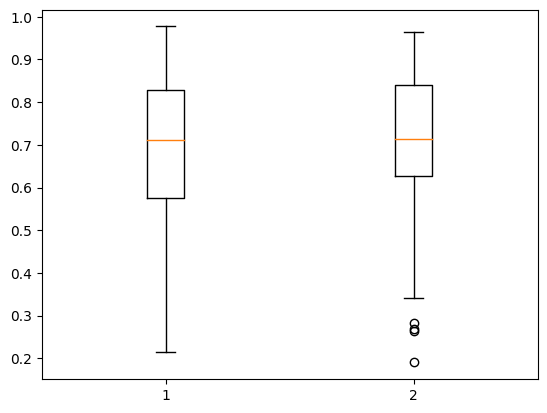

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from .npy file
data = [] 
data.append(np.load("L2HD_full_result_distribution\AntMorphology-Exact-v0_full_distribution_final_results_0.npy").flatten())
data.append(np.load("L2HD_full_result_distribution\AntMorphology-Exact-v0_full_distribution_final_results_1.npy").flatten())
# # Plot boxplot
plt.boxplot(data)
# plt.xlabel(["L2HD","L2HD-2"]) # Adjust label as needed
# plt.ylabel("Performance")
# plt.title("Boxplot of Performance")
plt.show()


In [2]:
import numpy as np 
res = [1,2,3] 
res = np.array(res) 
np.mean(res)

2.0

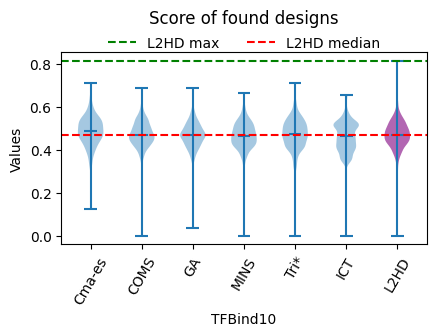

In [88]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the directory and baselines
# task_name = 'AntMorphology-Exact-v0'
# task_name = 'DkittyMorphology-Exact-v0'
# task_name = 'TFBind8-Exact-v0'
task_name = 'TFBind10-Exact-v0'

base_dir = f'full_result_distribution/{task_name}'
baselines = ['cma-es', 'coms', 'gradient-ascent', 'mins', 'tri-mentoring', 'ict', 'L2HD']
highlight_baseline = 'L2HD'
short_labels = ['Cma-es', 'COMS', 'GA', 'MINS', 'Tri*', 'ICT', 'L2HD']
task_to_name = {'AntMorphology-Exact-v0': 'Ant', 'DkittyMorphology-Exact-v0': 'Dkitty', 'TFBind8-Exact-v0': "TFBind8", 'TFBind10-Exact-v0': "TFBind10"}

# Initialize a dictionary to store the averaged results for each baseline
averaged_results = {}

# Iterate over each baseline
for baseline in baselines:
    seed_data = []
    
    # Collect and sort data for each seed
    for seed in range(8):
        file_path = f'{base_dir}/{baseline}/seed{seed}.npy'
        if os.path.exists(file_path):
            data = np.load(file_path).flatten()
            sorted_data = np.sort(data)
            seed_data.append(sorted_data)
        else:
            print(f"File not found: {file_path}")

    # Compute element-wise average across seeds
    if seed_data:
        seed_data = np.array(seed_data)
        averaged_results[baseline] = seed_data.flatten()

# Prepare data for the violin plot
plot_data = [averaged_results[baseline] for baseline in baselines]
l2hd_data = averaged_results[highlight_baseline]
l2hd_max = np.max(l2hd_data)
l2hd_median = np.median(l2hd_data)

# Create violin plot
plt.figure(figsize=(5, 4))
violin_parts = plt.violinplot(plot_data, showmedians=True)

# Set color and opacity for all violins, and highlight "L2HD" in green
for i, body in enumerate(violin_parts['bodies']):
    if i == baselines.index(highlight_baseline):
        body.set_facecolor('purple')  # Set green color for "L2HD"
        body.set_alpha(0.6)  # Higher opacity for emphasis
    else:
        body.set_alpha(0.4)  # Lower opacity for other baselines

# Add dashed lines for max and median values of "L2HD"
plt.axhline(y=l2hd_max, color='green', linestyle='--', linewidth=1.5, alpha=1.0, label=f'{highlight_baseline} max')
plt.axhline(y=l2hd_median, color='red', linestyle='--', linewidth=1.5, alpha=1.0, label=f'{highlight_baseline} median')

# Customize the plot
plt.xticks(ticks=range(1, len(baselines) + 1), labels=short_labels, rotation=60)
plt.xlabel(task_to_name[task_name])
plt.ylabel("Values")

# Title with newline for spacing
plt.title("Score of found designs\n")

# Move legend below the title but above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=False, 
           facecolor='white', framealpha=0.5, edgecolor='none', ncol=7)

# Adjust layout to ensure the plot fits with the title and legend properly
plt.tight_layout(pad=3.0)  # Increase padding to make room for the legend

plt.show()


In [32]:
import numpy as np
import os
import re

# Define the path to the input file
input_file = 'tf8-tri.txt'  # Adjust this to the correct path

# Directory where the results will be saved
output_dir = 'full_result_distribution/TFBind8-Exact-v0/tri-mentoring/'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Initialize a dictionary to store the scores for each seed
seed_scores = {}

# Read the input file
with open(input_file, 'r') as file:
    lines = file.readlines()

# Regex pattern to extract seed and score data
seed_pattern = re.compile(r"Current seed is (\d+)")
score_pattern = re.compile(r"candidate (\d+) score before .+ score now ([-\d.]+)")

# Parse the file
current_seed = None
scores = []

for line in lines:
    # Check for seed change
    seed_match = seed_pattern.search(line)
    if seed_match:
        # If there's an existing seed, save the collected scores
        if current_seed is not None:
            # Save the scores for the current seed
            seed_scores[current_seed] = np.array(scores)
        
        # Start collecting scores for the new seed
        current_seed = int(seed_match.group(1))
        scores = []  # Reset the scores list for the new seed

    # Check for score lines
    score_match = score_pattern.search(line)
    if score_match:
        # Append the score to the list
        score = float(score_match.group(2))
        scores.append(score)

# After the loop, save the last seed's data
if current_seed is not None:
    seed_scores[current_seed] = np.array(scores)

# Now, save each seed's scores to an .npy file
for seed, scores in seed_scores.items():
    assert(scores.shape[0]==128)
    output_file = os.path.join(output_dir, f'seed{seed}.npy')
    np.save(output_file, scores)

print("Scores have been saved successfully.")


Scores have been saved successfully.


In [15]:
# max_cmaes_scores = 0 
for seed in range(8):
    cmaes_scores = np.load(f'full_result_distribution/AntMorphology-Exact-v0/cma-es/seed{seed}.npy')
    print(max(cmaes_scores))

[1.67415]
[2.0045009]
[3.0764363]
[2.4650018]
[0.4432688]
[0.3487901]
[1.6086879]
[0.8817995]


In [8]:
best_ant_hyper[['num_fit_samples','eta_tf','eta_cont','alpha','classifier_free_guidance_weight','mean (80th)_ant','std (80th)_ant','mean (80th)_dkitty','std (80th)_dkitty','mean (80th)_tf8','std (80th)_tf8', 'mean (80th)_tf10', 'std (80th)_tf10']]

,num_fit_samples,eta_tf,eta_cont,alpha,classifier_free_guidance_weight,mean (80th)_ant,std (80th)_ant,mean (80th)_dkitty,std (80th)_dkitty,mean (80th)_tf8,std (80th)_tf8,mean (80th)_tf10,std (80th)_tf10
0,15000,0.2,0.00,0.8,-1.5,0.839375,0.010242,0.940125,0.001418,0.83926,0.014803,0.525875,0.00717
1,15000,0.2,0.05,0.8,-1.5,0.841409,0.010893,0.939602,0.001767,0.83926,0.014803,0.525875,0.00717
2,15000,0.2,0.20,0.8,-1.5,0.847239,0.005095,0.938429,0.001829,0.83926,0.014803,0.525875,0.00717


In [ ]:
import pandas as pd
best_ant_hyper = pd.read_csv('tuning_results/tune_23/result/tuning_result_ant_lengthscale1.0_sampling_lr0.001_delta0.25.csv')
best_ant_hyper = best_ant_hyper[best_ant_hyper['mean (100th)']>0.96]
#best_ant_hyper = best_ant_hyper[best_ant_hyper['alpha']==0.7]
#best_ant_hyper = best_ant_hyper[best_ant_hyper['eta']==0.05]
best_dkitty_hyper = pd.read_csv('tuning_results/tune_23/result/tuning_result_dkitty_lengthscale1.0_sampling_lr0.001_delta0.25.csv')
best_dkitty_hyper = best_dkitty_hyper[best_dkitty_hyper['mean (100th)']>0.96]
best_dkitty_hyper.merge(best_ant_hyper,on=['sampling_lr','lengthscale','delta','eta','alpha','classifier_free_guidance_weight'])


In [ ]:
n='abc'
x = f'{n}12'
x